In [ ]:
"""
- Reinforces techniques to read in data
- Introduces GroupBy
- Introduces Data Viz
"""

In [19]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Reading CSV with Pandas is super easy
chicago = pd.read_csv('data/chicago-salaries.csv')
chicago.head()

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,$88968.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,$80778.00
2,"AARON, KARINA",POLICE OFFICER,POLICE,$80778.00
3,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,$84780.00
4,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,$104736.00


In [14]:
# We can use a subset of the columns
no_title = pd.read_csv('data/chicago-salaries.csv', usecols=['Name', 'Department', 'Employee Annual Salary'])
no_title.head()

,Name,Department,Employee Annual Salary
0,"AARON, ELVIA J",WATER MGMNT,$88968.00
1,"AARON, JEFFERY M",POLICE,$80778.00
2,"AARON, KARINA",POLICE,$80778.00
3,"AARON, KIMBERLEI R",GENERAL SERVICES,$84780.00
4,"ABAD JR, VICENTE M",WATER MGMNT,$104736.00


In [15]:
# We can use different column names
# Specify index of header row to replace them with our names
our_column_names = pd.read_csv('data/chicago-salaries.csv', header=0, names=['name', 'title', 'department', 'salary'])
our_column_names.head()

,name,title,department,salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,$88968.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,$80778.00
2,"AARON, KARINA",POLICE OFFICER,POLICE,$80778.00
3,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,$84780.00
4,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,$104736.00


In [16]:
# Or we could both use a subset of columns and rename them
no_title = pd.read_csv('data/chicago-salaries.csv', usecols=['Name', 'Department', 'Employee Annual Salary'])
both = no_title.rename(columns={'Name': 'name', 'Department': 'dept', 'Employee Annual Salary': 'salary'})
both.head()

,name,dept,salary
0,"AARON, ELVIA J",WATER MGMNT,$88968.00
1,"AARON, JEFFERY M",POLICE,$80778.00
2,"AARON, KARINA",POLICE,$80778.00
3,"AARON, KIMBERLEI R",GENERAL SERVICES,$84780.00
4,"ABAD JR, VICENTE M",WATER MGMNT,$104736.00


In [20]:
# We can also pass converters on columns
converted = pd.read_csv(
    'data/chicago-salaries.csv',
    converters={
        'Employee Annual Salary': lambda x: float(x.replace('$', ''))
    })
chicago = converted.rename(columns={'Name': 'name', 'Position Title': 'title', 'Department': 'dept', 'Employee Annual Salary': 'salary'})
chicago.head()

,name,title,dept,salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,88968
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,80778
2,"AARON, KARINA",POLICE OFFICER,POLICE,80778
3,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,84780
4,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,104736


In [21]:
# Remember the tally method? Pandas makes it easy
chicago['dept'].value_counts()

POLICE                   13570
FIRE                      4875
STREETS & SAN             2090
WATER MGMNT               1848
AVIATION                  1344
TRANSPORTN                1200
OEMC                      1135
PUBLIC LIBRARY             951
GENERAL SERVICES           924
FAMILY & SUPPORT           679
FINANCE                    560
HEALTH                     555
LAW                        425
CITY COUNCIL               397
BUILDINGS                  257
COMMUNITY DEVELOPMENT      212
BUSINESS AFFAIRS           173
BOARD OF ELECTION          111
DoIT                       106
MAYOR'S OFFICE              93
IPRA                        83
CITY CLERK                  82
PROCUREMENT                 81
CULTURAL AFFAIRS            79
HUMAN RESOURCES             68
ANIMAL CONTRL               67
INSPECTOR GEN               54
BUDGET & MGMT               43
ADMIN HEARNG                39
DISABILITIES                27
TREASURER                   24
HUMAN RELATIONS             17
BOARD OF

In [22]:
chicago.ix[0]

name       AARON,  ELVIA J
title     WATER RATE TAKER
dept           WATER MGMNT
salary               88968
Name: 0, dtype: object

In [23]:
# Get number of distinct title within each department
chicago.groupby('dept').apply(lambda df: len(set(df['title'])))

dept
ADMIN HEARNG              15
ANIMAL CONTRL             17
AVIATION                 123
BOARD OF ELECTION         25
BOARD OF ETHICS            9
BUDGET & MGMT             24
BUILDINGS                 50
BUSINESS AFFAIRS          62
CITY CLERK                37
CITY COUNCIL              28
COMMUNITY DEVELOPMENT     70
CULTURAL AFFAIRS          39
DISABILITIES              20
DoIT                      41
FAMILY & SUPPORT          99
FINANCE                  104
FIRE                      99
GENERAL SERVICES         119
HEALTH                   115
HUMAN RELATIONS           12
HUMAN RESOURCES           30
INSPECTOR GEN             28
IPRA                      22
LAW                       52
LICENSE APPL COMM          1
MAYOR'S OFFICE            29
OEMC                      70
POLICE                   129
POLICE BOARD               2
PROCUREMENT               30
PUBLIC LIBRARY            68
STREETS & SAN             70
TRANSPORTN               156
TREASURER                 16
WATER MGM

In [25]:
# Sum of title lengths by dept
chicago.groupby('dept').apply(lambda df: df['title'].map(lambda title: len(title)).sum())

dept
ADMIN HEARNG                931
ANIMAL CONTRL              1500
AVIATION                  29052
BOARD OF ELECTION          2924
BOARD OF ETHICS             185
BUDGET & MGMT               921
BUILDINGS                  6294
BUSINESS AFFAIRS           3917
CITY CLERK                 1972
CITY COUNCIL               7515
COMMUNITY DEVELOPMENT      4567
CULTURAL AFFAIRS           1843
DISABILITIES                617
DoIT                       2637
FAMILY & SUPPORT          13727
FINANCE                   11357
FIRE                      74395
GENERAL SERVICES          19313
HEALTH                    13265
HUMAN RELATIONS             491
HUMAN RESOURCES            1435
INSPECTOR GEN              1222
IPRA                       1884
LAW                        9239
LICENSE APPL COMM            10
MAYOR'S OFFICE             1941
OEMC                      32690
POLICE                   216020
POLICE BOARD                 45
PROCUREMENT                2022
PUBLIC LIBRARY            15079
STR

In [26]:
chicago['title'].map(lambda title: len(title)).sum() / len(chicago)

17

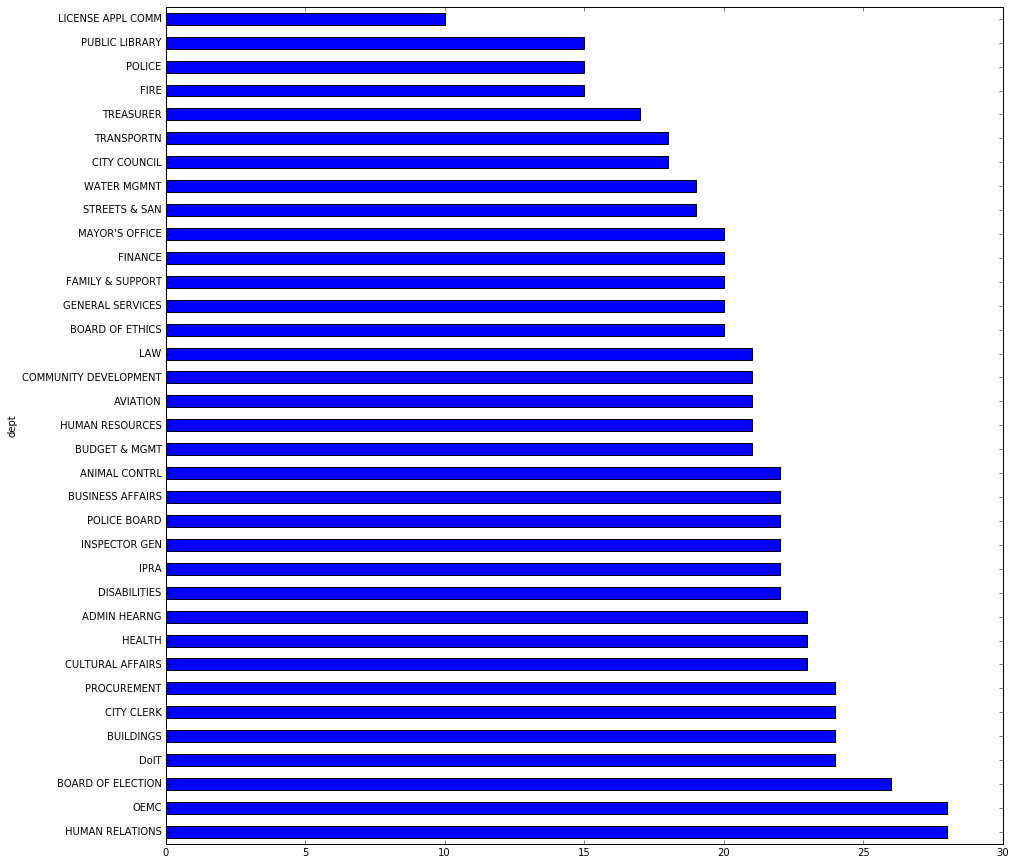

In [30]:
def get_average_title_length(group):
    return group.title.map(lambda x: len(x)).sum() / len(group)

# Average title length by department
title_length_by_dept = chicago.groupby('dept').apply(get_average_title_length).order(ascending=False)
title_length_by_dept.plot(kind='barh', figsize(15, 15))

In [41]:
# Greatest salary discrepancy by dept
sorted_diffs = chicago.groupby('dept').apply(lambda df: df['salary'].max() - df['salary'].min())
sorted_diffs.sort(ascending=False)
sorted_diffs.head()

dept
POLICE            250644.00
MAYOR'S OFFICE    216209.04
FIRE              166212.00
PUBLIC LIBRARY    160800.40
LAW               158649.00
dtype: float64

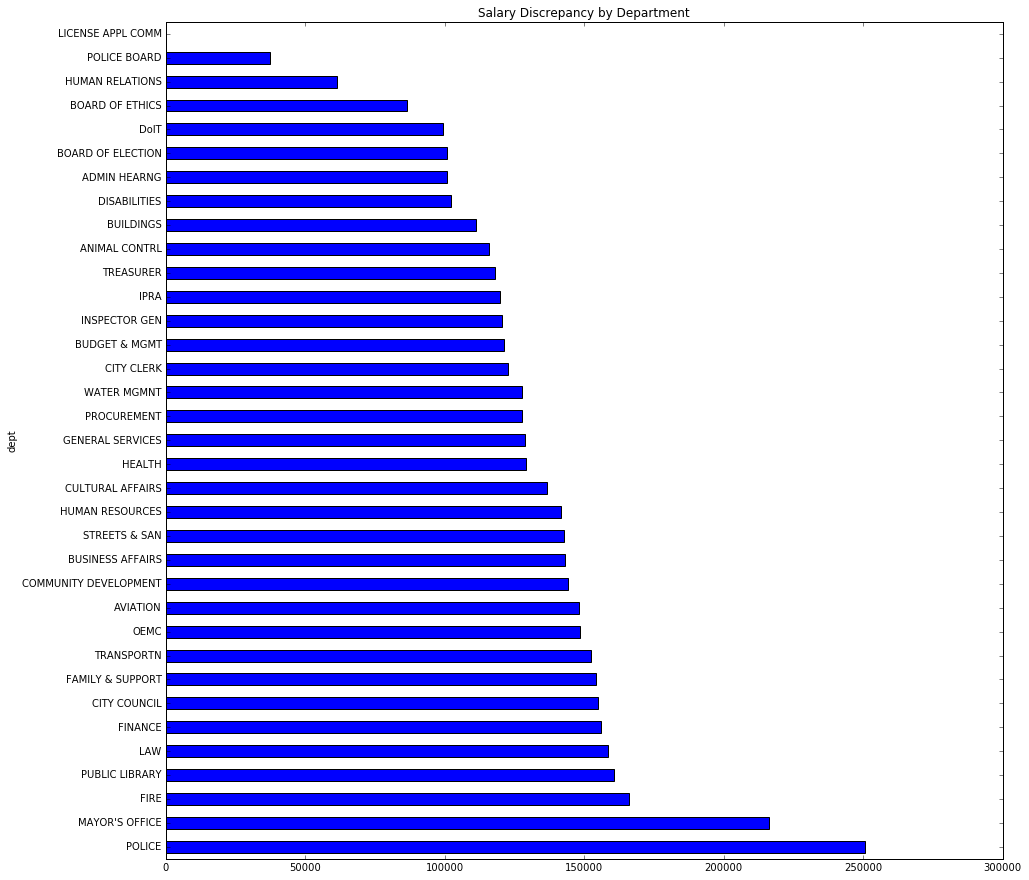

In [35]:
sorted_diffs.plot(kind='barh', figsize=(15,15), title="Salary Discrepancy by Department")

In [44]:
# Lets look closer on the police department
police_salaries = chicago[chicago['dept'] == 'POLICE'].sort('salary')
police_salaries.head()

,name,title,dept,salary
25816,"SCHELLS, SHAKALA D",POLICE CADET,POLICE,9360
30741,"WHITE, JAHAZIEL J",PROGRAM AIDE,POLICE,9360
19521,"MOORE, KEMON J",PROGRAM AIDE,POLICE,9360
5920,"CRUMP, AUTUMN R",POLICE CADET,POLICE,9360
9658,"GARDNER, KAWANDA D",PROGRAM AIDE,POLICE,9360


In [45]:
# What are the max salaries in each department?
max_salaries = chicago.groupby('dept').apply(lambda df: df['salary'].max()).sort(ascending=False, inplace=False)
max_salaries.head()

dept
POLICE            260004
MAYOR'S OFFICE    216210
FIRE              202728
HEALTH            177000
LAW               173664
dtype: float64

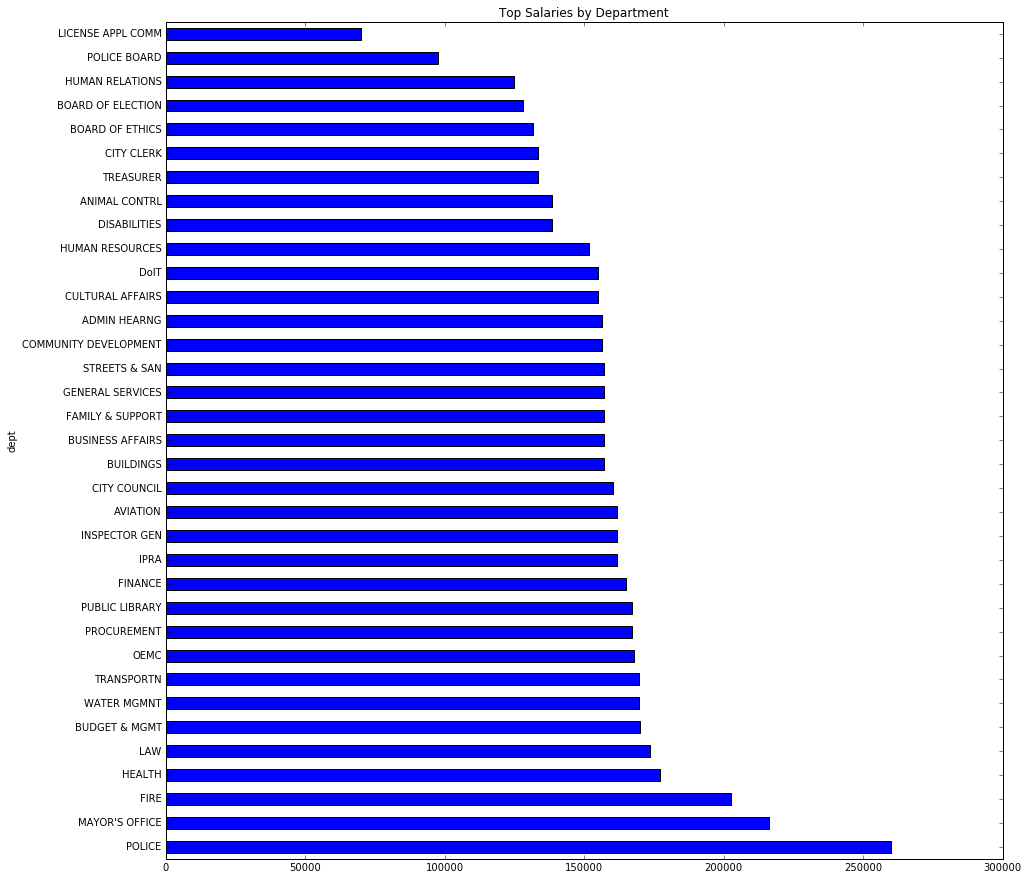

In [38]:
max_salaries.plot(title="Top Salaries by Department", figsize=(15,15), kind='barh')

In [40]:
max_salaries.describe()

count        35.000000
mean     157353.942857
std       31279.788341
min       69888.000000
25%      144996.000000
50%      157092.000000
75%      167508.000000
max      260004.000000
dtype: float64